In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# ROMS output can be found at
# https://gcoos5.geos.tamu.edu/TAMU-ROFS/archives/txla2/aggregate/

# How to get files programaticaly
# example file
# https://gcoos5.geos.tamu.edu/TAMU-ROFS/archives/txla2/aggregate/TXLA2.ocn.his.2022_05_06_a.nc
# so lets split for visibility
base = 'https://gcoos5.geos.tamu.edu/TAMU-ROFS/archives/txla2/aggregate/'
file = 'TXLA2.ocn.his.2022_05_06_a.nc'
url = base + file
print(url)
#now lets generalize
file = 'TXLA2.ocn.his.%s_%02d_%02d_a.nc' % (2022, 5,7)
print(base+file)


https://gcoos5.geos.tamu.edu/TAMU-ROFS/archives/txla2/aggregate/TXLA2.ocn.his.2022_05_06_a.nc
https://gcoos5.geos.tamu.edu/TAMU-ROFS/archives/txla2/aggregate/TXLA2.ocn.his.2022_05_07_a.nc


In [3]:
#using a downloaded file
path = '/Users/veronicaruizxomchuk/Downloads/TXLA2.ocn.his.2022_05_06_a.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:         (tracer: 6, s_rho: 30, s_w: 31, eta_rho: 191, xi_rho: 671, eta_u: 191, xi_u: 670, eta_v: 190, xi_v: 671, eta_psi: 190, xi_psi: 670, ocean_time: 24)
Coordinates:
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2022-05-06T01:00:00 ... 2022-...
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/101)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    shuffle         int32 ...
    ...              ...
    Uwind           (ocean_time, eta_rho, xi_rho) float32 ...
    Vwind           (ocean_time, eta_rho, xi_rho) float32 ...
    shflux          (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux          (ocean_time, eta_rho, xi_rho) float32 ...
    sustr           (ocean_time, eta_u, xi_u) float32 ...
    svstr           (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/33)
    file:              /scratch/user/d.kobashi/projects/ROFS/projects/txla2/o...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             TXLA Regional Ocean Forecast Sysetm (ROFS) with dyes a...
    var_info:          varinfo.dat
    ...                ...
    compiler_command:  /sw/eb/sw/impi/2019.9.304-iccifort-2020.4.304/intel64/...
    compiler_flags:    -fp-model fast -heap-arrays -ip -O3
    tiling:            010x012
    history:           ROMS/TOMS, Version 3.7, Saturday - May 7, 2022 -  3:46...
    ana_file:          /scratch/user/d.kobashi/source_code/COAWST/Functionals...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SPFLUX,...

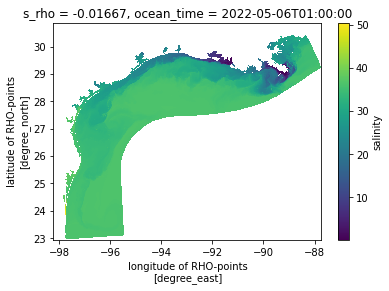

In [4]:
#surface, 1st time step
ds['salt'].isel(ocean_time=0, s_rho=-1).plot(x='lon_rho', y='lat_rho')

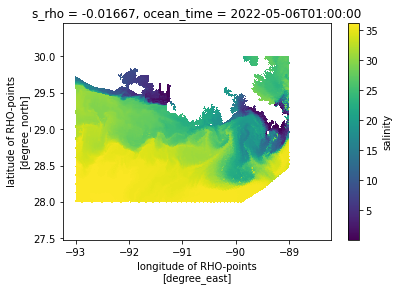

In [5]:
# cut a piece:
mask = (ds.lat_rho>28) & (ds.lat_rho<30) & (ds.lon_rho>-93) & (ds.lon_rho<-89)
#surface
ds['salt'].isel(ocean_time=0, s_rho=-1).where(mask, drop=True).plot(x='lon_rho', y='lat_rho')

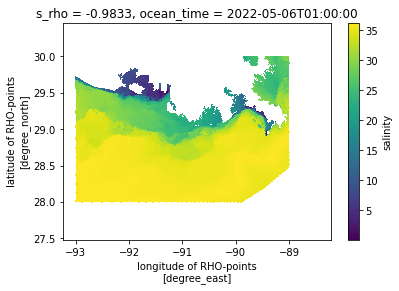

In [6]:
#bottom
ds['salt'].isel(ocean_time=0, s_rho=0).where(mask, drop=True).plot(x='lon_rho', y='lat_rho')

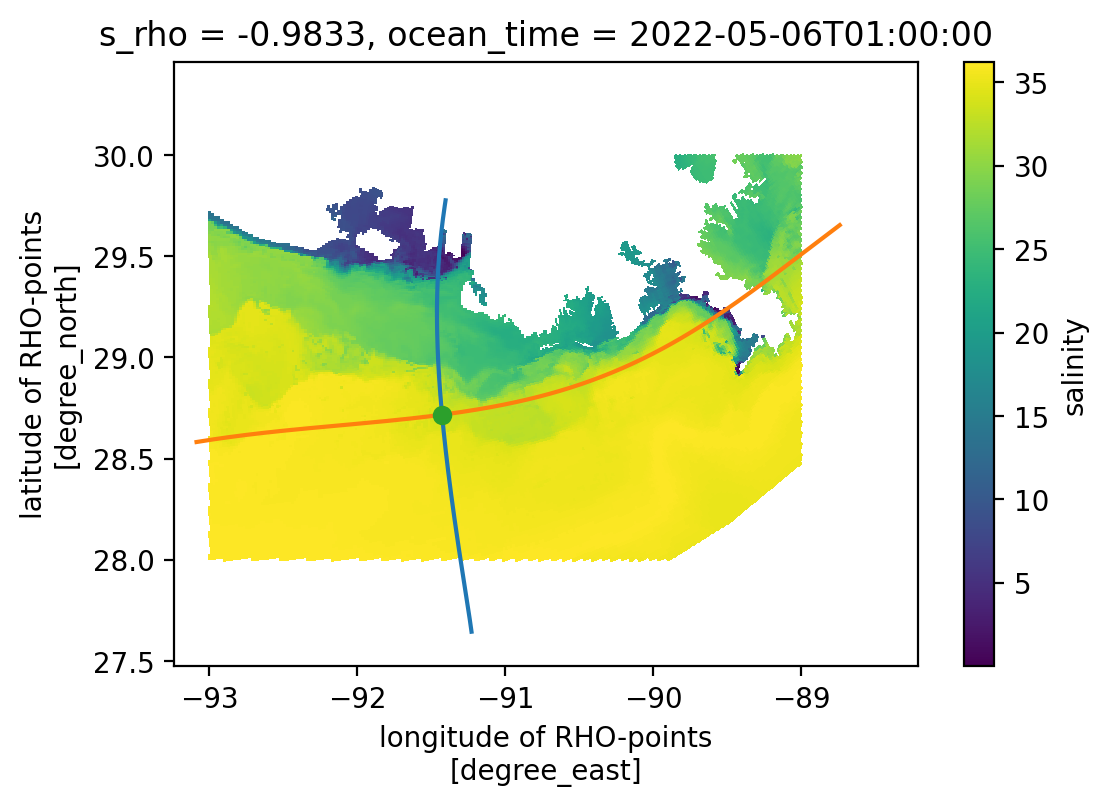

In [7]:
# dimensions orders in ROMS are: 
#[time (ocean_time), depth (s), across-shore (eta), along-shore (xi)]
# lets figure out how to select slices

fig, ax = plt.subplots(dpi=200)
salt = ds['salt'].isel(ocean_time=0, s_rho=0).where(mask, drop=True)

salt.plot(x='lon_rho', y='lat_rho', ax = ax)
# Salt has dimensions [eta,xi], because we have already selected the other ones

# lets chose a transect

# along shore direction is last (e.g xi). So we are picking one
# to get an accros shore transect (the blue line)
# say i=possition (0 is lext and increases to the right)
i= 100
ax.plot(salt.lon_rho[:,i], salt.lat_rho[:,i])

# accros shore direction is 2nd to last (e.g eta). So we are picking one
# to get an an along shore transect (the orange linr)
#say j=possition (0 is bottom and increases to the top)
j= 70
ax.plot(salt.lon_rho[j,:], salt.lat_rho[j,:])

# lets choose point
ax.plot(salt.lon_rho[j,i], salt.lat_rho[j,i], 'o')

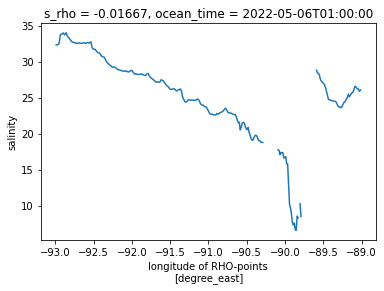

In [26]:
#this is a salinity transect (orange)
salt = ds['salt'].isel(ocean_time=0, s_rho=-1).where(mask, drop=True)
salt.isel(eta_rho=j).plot(x='lon_rho')

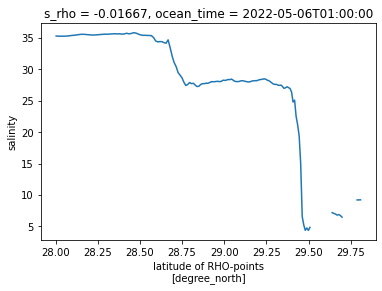

In [28]:
#this is a salinity transect (blue)
salt = ds['salt'].isel(ocean_time=0, s_rho=-1).where(mask, drop=True)
salt.isel(xi_rho=i).plot(x='lat_rho')

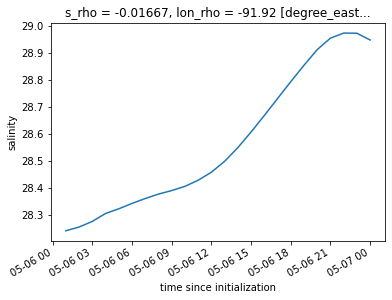

In [29]:
# this is a time series (green point)
salt = ds['salt'].isel(s_rho=-1).where(mask, drop=True)
salt.isel(xi_rho=i, eta_rho=j).plot(x='ocean_time')

## Try to make maps with different variables and cartopy features